<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/1911522029_Arif_Roska_Perdana_UAS_APM_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import data
from google.colab import files
uploaded = files.upload()

Saving Student_Behaviour.csv to Student_Behaviour (3).csv


In [34]:
import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

df = pd.read_csv(io.BytesIO(uploaded['Student_Behaviour.csv']), encoding= 'latin-1')
df.head(n=10)

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th_Mark,12th_Mark,college_mark,hobbies,daily studing time,prefer_to_study_in,salary_expectation,Do you like your degree?,possibility_of_choosing _their_career_based_on_their_degree,social medai & video games spending Time,Travelling Time,Stress_Level,Financial_Status,Are_you_doing_a_parttime_job_right_now
0,No,Male,BCA,100.0,58.0,79.0,65.00,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.00,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.00,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.00,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.00,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
5,Yes,Female,BCA,139.0,33.0,90.0,75.00,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,0 - 30 minutes,Bad,good,No
6,Yes,Male,BCA,165.0,50.0,70.0,63.00,3.0,Reading books,1 - 2 Hour,Morning,15000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,Good,good,No
7,No,Male,BCA,152.0,43.0,61.6,61.67,75.0,Sports,1 - 2 Hour,Morning,25000,Yes,50%,1 - 1.30 hour,1 - 1.30 hour,Good,good,No
8,No,Male,BCA,190.0,85.0,88.2,67.50,60.0,Video Games,0 - 30 minute,Morning,20000,Yes,75%,1.30 - 2 hour,1 - 1.30 hour,Bad,Bad,No
9,No,Male,BCA,150.0,84.0,60.0,65.00,70.0,Video Games,0 - 30 minute,Anytime,20000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No


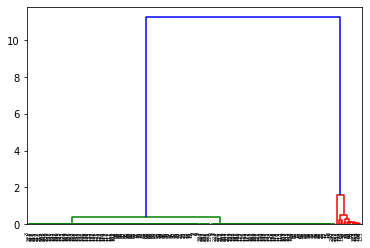

In [57]:
# X = df.iloc[:, [3, 4]].values
# df.loc[df.prefer_to_study_in == 'Morning'] = 0
# df.loc[df.prefer_to_study_in == 'Night'] = 1
# df.loc[df.prefer_to_study_in == 'Anytime'] = 2
# df[['prefer_to_study_in']] = df[['prefer_to_study_in']].astype(float)

# df.loc[df.Stress_Level == 'Bad'] = 0
# df.loc[df.Stress_Level == 'Awful'] = 1
# df.loc[df.Stress_Level == 'good'] = 2
# df.loc[df.Stress_Level == 'Fabolous'] = 3
# df[['Stress_Level']] = df[['Stress_Level']].astype(float)

# df.loc[df.Financial_Status == 'Bad'] = 0
# df.loc[df.Financial_Status == 'good'] = 1
# df[['Financial_Status']] = df[['Financial_Status']].astype(float)

# df.loc[df.Are_you_doing_a_parttime_job_right_now == 'No'] = 0
# df.loc[df.Are_you_doing_a_parttime_job_right_now == 'Yes'] = 1
# df[['Are_you_doing_a_parttime_job_right_now']] = df[['Are_you_doing_a_parttime_job_right_now']].astype(float)

features = ['10th_Mark', '12th_Mark', 'college_mark', 'salary_expectation']
X = df[features].values

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

sc = StandardScaler()
df_scaled = sc.fit_transform(X)
df_normalized = normalize(df_scaled)
#
# Reduce the dimensionality of data to 3 features
#
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [58]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

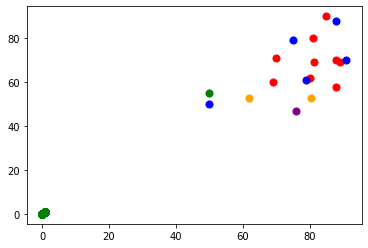

In [62]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()